## Descarga y formatting del CSV de los datos

In [ ]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2024-03-03 15:51:27--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [             <=>    ]  52.85M  15.2MB/s    in 3.5s    

2024-03-03 15:51:31 (15.2 MB/s) - ‘airbnb-listings.csv’ saved [55414009]



In [ ]:
import cv2
import numpy
import pandas
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

In [ ]:
data = pandas.read_csv("airbnb-listings.csv", sep = ';')
data = data.dropna(subset=['Price'])
data

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,17823671,https://www.airbnb.com/rooms/17823671,20170407214119,2017-04-08,Room in beautiful flat in Madrid centre!! SC8_1_2,Great room with large bed and two windows,Amazing 12 bedroom flat with 3 complete bathro...,Great room with large bed and two windows Amaz...,none,"The "" Barrio de las Letras "" is one of the mos...",...,NaN,NaN,NaN,NaN,NaN,strict,20,NaN,"40.41487093316894,-3.6965780975998435","Host Has Profile Pic,Host Identity Verified,Re..."
1,17309526,https://www.airbnb.com/rooms/17309526,20170407214050,2017-04-08,Double room in Gracia/Whole Apartment,Double room in Gracia - Habitación doble en Gr...,NaN,Double room in Gracia - Habitación doble en Gr...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"41.40132396962952,2.163712769014997","Host Has Profile Pic,Requires License"
2,801113,https://www.airbnb.com/rooms/801113,20170407214119,2017-04-08,DOUBLE ROOM WITH PRIVATE BATHROOM IN LA LATINA,Bright and spacious double room and bathroom f...,Spacious double room with private bathroom and...,Bright and spacious double room and bathroom f...,none,".Safety neighborhood with all the amenities, g...",...,9.0,10.0,9.0,NaN,NaN,moderate,1,3.15,"40.40860126037668,-3.7145957909729637","Host Has Profile Pic,Is Location Exact,Require..."
3,7357466,https://www.airbnb.com/rooms/7357466,20170407214119,2017-04-08,Alquiler habitación mes de agosto,"Hola, somos una familia de 5 amigos que vivímo...","La habitación que alquilamos es amplia, lumino...","Hola, somos una familia de 5 amigos que vivímo...",none,El piso es muy amplio y las zonas comunes dan ...,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.43408638806261,-3.654979849617808","Host Has Profile Pic,Host Identity Verified,Re..."
4,17050866,https://www.airbnb.com/rooms/17050866,20170407214119,2017-04-08,Habitacion a solo 3 min de atocha,Nuestro Habitacion esta hubicada en centro de...,NaN,Nuestro Habitacion esta hubicada en centro de...,none,Es un barrio céntrico de madrid . Donde hay mu...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,0.71,"40.44181649452356,-3.6451428471469227","Host Has Profile Pic,Requires License"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,16231125,https://www.airbnb.com/rooms/16231125,20170407214119,2017-04-08,"Piso en en centro de Madrid,Quevedo","Piso de 3 habitaciones, un salón, un baño y un...",NaN,"Piso de 3 habitaciones, un salón, un baño y un...",none,Está muy bien comunicado y muy céntrico. Ademá...,...,NaN,NaN,NaN,NaN,NaN,moderate,1,NaN,"40.4348724447834,-3.707547039320753","Host Has Profile Pic,Requires License"
13997,4741021,https://www.airbnb.com/rooms/4741021,20170407214119,2017-04-08,"OLAVIDE IV, 3ºD, Friendly Rentals",The apartment is in a characteristic building ...,This lovely apartment is one of several we can...,The apartment is in a characteristic building ...,none,This very safe residential district is surroun...,...,8.0,NaN,NaN,NaN,NaN,strict,145,0.17,"40.43613375660163,-3.7027578557736502","Host Has Profile Pic,Is Location Exact,Require..."
13998,5803594,https://www.airbnb.com/rooms/5803594,20170407214119,2017-04-08,Habitación pequeña cómoda amena tranquila.,cocina para utilizar para comidas muy básicas ...,"HABITACIÓN privada pequeña pero cómoda,apartam...",cocina para utilizar para comidas muy básicas ...,none,Barrio de Madrid Ubicado cerca plaza de toros...,...,9.0,8.0,9.0,NaN,NaN,strict,1,2.10,"40.423445712695965,-3.645238780837596","Host Has Profile Pic,Requires License"
13999,16025541,https://www.airbnb.com/rooms/16025541,20170407214119,2017-04-08,New reformed apartment. Everything new!!!!,Outside vieuw without noise. Ideal for two per...,NaN,Outside vieuw without noise. Ideal for two per.

In [ ]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

## Descarga de imágenes

In [ ]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=numpy.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

Normalización y conversión en el rango [0, 1]

In [ ]:
images, idxs = download_images(data['Thumbnail Url'], max_imgs=100)
images = images.astype("float32") / 255.
images.shape

100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


(60, 224, 224, 3)

Filtrado acorde en los demás datos

In [ ]:
filtered_data = data.iloc[idxs]
filtered_data

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,17823671,https://www.airbnb.com/rooms/17823671,20170407214119,2017-04-08,Room in beautiful flat in Madrid centre!! SC8_1_2,Great room with large bed and two windows,Amazing 12 bedroom flat with 3 complete bathro...,Great room with large bed and two windows Amaz...,none,"The "" Barrio de las Letras "" is one of the mos...",...,NaN,NaN,NaN,NaN,NaN,strict,20,NaN,"40.41487093316894,-3.6965780975998435","Host Has Profile Pic,Host Identity Verified,Re..."
2,801113,https://www.airbnb.com/rooms/801113,20170407214119,2017-04-08,DOUBLE ROOM WITH PRIVATE BATHROOM IN LA LATINA,Bright and spacious double room and bathroom f...,Spacious double room with private bathroom and...,Bright and spacious double room and bathroom f...,none,".Safety neighborhood with all the amenities, g...",...,9.0,10.0,9.0,NaN,NaN,moderate,1,3.15,"40.40860126037668,-3.7145957909729637","Host Has Profile Pic,Is Location Exact,Require..."
3,7357466,https://www.airbnb.com/rooms/7357466,20170407214119,2017-04-08,Alquiler habitación mes de agosto,"Hola, somos una familia de 5 amigos que vivímo...","La habitación que alquilamos es amplia, lumino...","Hola, somos una familia de 5 amigos que vivímo...",none,El piso es muy amplio y las zonas comunes dan ...,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.43408638806261,-3.654979849617808","Host Has Profile Pic,Host Identity Verified,Re..."
4,17050866,https://www.airbnb.com/rooms/17050866,20170407214119,2017-04-08,Habitacion a solo 3 min de atocha,Nuestro Habitacion esta hubicada en centro de...,NaN,Nuestro Habitacion esta hubicada en centro de...,none,Es un barrio céntrico de madrid . Donde hay mu...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,0.71,"40.44181649452356,-3.6451428471469227","Host Has Profile Pic,Requires License"
5,6987048,https://www.airbnb.com/rooms/6987048,20170407214119,2017-04-08,3 bedroom apartment !!,Spacious apartment with three rooms that are r...,Apartment of 110 square meters. It comprises e...,Spacious apartment with three rooms that are r...,none,It is a quiet neighborhood all amenities : fre...,...,10.0,6.0,8.0,NaN,NaN,strict,1,0.05,"40.41147994191638,-3.6496248306429497","Host Has Profile Pic,Requires License"
6,13717362,https://www.airbnb.com/rooms/13717362,20170407214119,2017-04-08,"Habitacion individual,bien comunicada trasporte p",Lugares de interés: El parque norte A 100 M t...,NaN,Lugares de interés: El parque norte A 100 M t...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,flexible,2,0.11,"40.484641108859414,-3.689573603312865","Host Has Profile Pic,Is Location Exact,Require..."
7,17966558,https://www.airbnb.com/rooms/17966558,20170407214119,2017-04-08,Comfortable spacious safe,Bedding to ensure a one for cleaning disinfect...,NaN,Bedding to ensure a one for cleaning disinfect...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.495898597507015,-3.696306029182311","Host Has Profile Pic,Requires License,Instant ..."
8,4268672,https://www.airbnb.com/rooms/4268672,20170407214119,2017-04-08,Loft in the Prado WIFI - Air C.,Loft in the Barrio de las Letras. Entirely res...,The loft is in a completely renovated building...,Loft in the Barrio de las Letras. Entirely res...,none,The loft is located in the heart of Madrid. In...,...,10.0,10.0,10.0,NaN,NaN,strict,2,5.64,"40.41358864648611,-3.697518995171817","Host Has Profile Pic,Host Identity Verified,Is..."
10,4477908,https://www.airbnb.com/rooms/4477908,20170407214119,2017-04-08,Nice bedroom in Madrid Downtown,Nice bedroom with Private Bathroom in City C...,"The apartment is located in the City Center, o...",Nice bedroom with Private Bathroom in City C...,none,"It is a wonderfull place, full of life, shops,...",...,9.0,10.0,10.0,NaN,NaN,flexible,2,0.17,"40.41896110

## Guardado de los datos para posterior uso/selección

In [ ]:
numpy.save('images.npy', images)
filtered_data.to_csv('filtered_data.csv', sep=';', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp images.npy /content/drive/MyDrive/images_final.npy
!cp filtered_data.csv /content/drive/MyDrive/filtered_data.csv

!ls -lah images* filtered*  # Comprobación

-rw-r--r-- 1 root root 225K Mar  3 15:52 filtered_data.csv
-rw-r--r-- 1 root root  35M Mar  3 15:52 images.npy


In [ ]:
# Comprobamos a abrirlos de nuevo
saved_data = pandas.read_csv("/content/drive/MyDrive/filtered_data.csv", sep=';')
saved_imgs = numpy.load("/content/drive/MyDrive/images_final.npy")
saved_data.shape, saved_imgs.shape

((60, 89), (60, 224, 224, 3))

Así, por ejemplo, cargamos y visualizamos la distribución de las etiquetas:

<Axes: >

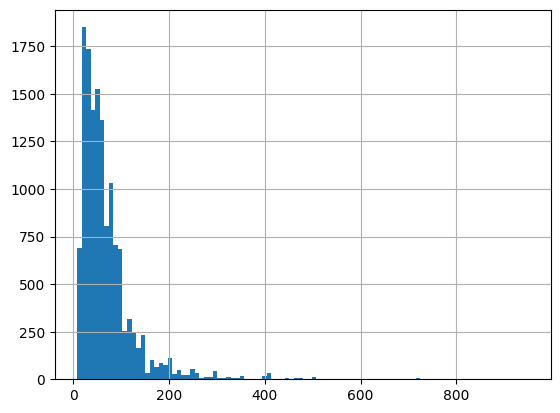

In [ ]:
data['Price'].hist(bins=100)

Y podemos dividir por porcentajes, para crear clases, como por ejemplo:

In [ ]:
data['Price'].describe()

count    13990.000000
mean        71.515154
std         67.863596
min          9.000000
25%         32.000000
50%         55.000000
75%         85.000000
max        950.000000
Name: Price, dtype: float64

<Axes: >

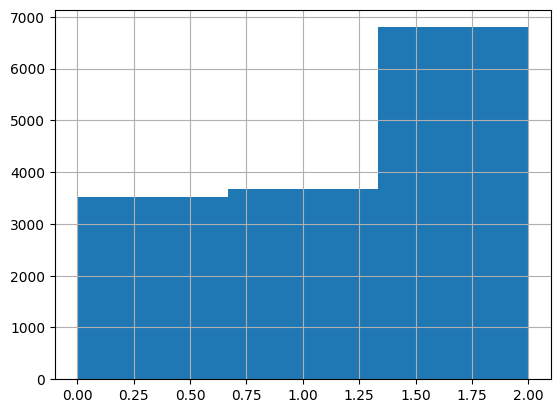

In [ ]:
y_class = []
for y in data['Price']:
  if y <= 32:
    y_class.append(0) # Rango más barato
  elif 32 < y <= 55:
    y_class.append(1) # Rango intermedio
  else:
    y_class.append(2)
y_class = pandas.Series(y_class)
y_class.hist(bins=3)

dividimos todo ent rain y test antes de nada sabiendo que las filas de imgs equivalen a las de data para ello fijamos el random_state, luego realizaremos los cambios de preprocesado en train y se aplicarán posteriormente en test y val, pero siempre siendo las transformaciones que se han realizado visualizabdo el train.

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_imgs, test_imgs = train_test_split(saved_data, saved_imgs, test_size=0.2, random_state=42)

# Dividimos...
train_data, val_data, train_imgs, val_imgs = train_test_split(train_data, train_imgs, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2 del total

# Verificamos...
print("Conjunto de entrenamiento (datos):", train_data.shape)
print("Conjunto de validación (datos):", val_data.shape)
print("Conjunto de prueba (datos):", test_data.shape)
print("Conjunto de entrenamiento (imágenes):", train_imgs.shape)
print("Conjunto de validación (imágenes):", val_imgs.shape)
print("Conjunto de prueba (imágenes):", test_imgs.shape)


Conjunto de entrenamiento (datos): (36, 89)
Conjunto de validación (datos): (12, 89)
Conjunto de prueba (datos): (12, 89)
Conjunto de entrenamiento (imágenes): (36, 224, 224, 3)
Conjunto de validación (imágenes): (12, 224, 224, 3)
Conjunto de prueba (imágenes): (12, 224, 224, 3)


In [ ]:
train_data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
40,6980520,https://www.airbnb.com/rooms/6980520,20170407214119,2017-04-08,Central By Matadero/Madrid rio park,"Lovely bedroom by the river in front of the ""M...",2 Super nice luminous bedrooms and with a huge...,"Lovely bedroom by the river in front of the ""M...",none,Neigborhood with great atmosphere thanks to th...,...,10.0,10.0,10.0,NaN,NaN,flexible,10,1.75,"40.393206075285015,-3.6973536308306976","Host Has Profile Pic,Host Identity Verified,Re..."
18,16982161,https://www.airbnb.com/rooms/16982161,20170407214119,2017-04-08,"Retro apartment, single bedroom + private living","Located in a beautiful street, right in the he...",It's a typical Spanish building with authentic...,"Located in a beautiful street, right in the he...",none,Goya is in the northern centre of Madrid. Not ...,...,10.0,10.0,10.0,NaN,NaN,strict,4,1.40,"40.42744610110339,-3.6694051922525963","Host Has Profile Pic,Requires License"
39,191661,https://www.airbnb.com/rooms/191661,20170407214119,2017-04-08,PLAZA MAYOR LOFT the genuine Madrid,Everyone surrenders to the Plaza Mayor loft. S...,Refurbished LOFT located in a quiet arcade... ...,Everyone surrenders to the Plaza Mayor loft. S...,none,La situación es inmejorable. La zona estaba ce...,...,10.0,10.0,9.0,NaN,NaN,strict,3,1.92,"40.41515719356404,-3.707310638370718","Host Has Profile Pic,Host Identity Verified,Is..."
56,15868228,https://www.airbnb.com/rooms/15868228,20170407214119,2017-04-08,La Casa del Sol,Live the best experience in Madrid. The apt is...,La mejor ubicación de Madrid! Situado estratég...,Live the best experience in Madrid. The apt is...,none,"Un barrio realmente madrileño, ¡vive la experi...",...,10.0,10.0,9.0,NaN,NaN,moderate,1,5.32,"40.41985413791544,-3.7054724299132413","Host Has Profile Pic,Host Identity Verified,Re..."
30,3392806,https://www.airbnb.com/rooms/3392806,20170407214119,2017-04-08,Cozy & Romantic Apartment,Fully furnished cozy apartment. Quiet and frie...,Cozy and spacious fully furnished apartment. F...,Fully furnished cozy apartment. Quiet and frie...,none,NaN,...,10.0,10.0,9.0,NaN,NaN,strict,2,1.39,"40.43234237915783,-3.7017576006273383","Host Has Profile Pic,Host Identity Verified,Is..."


Nos quedamos con las variables más importantes y las dividimos en categóricas y numéricas para aplicar a cada una su preprocesado adecuado,
En las numéricas:
-Sustituir los Nan por la media y usar MinMaxScaler para tenerlas en el rango entre 0 y 1.
Categóricas:
-usar OneHotEncoder para codificar estas variables. Una vez realizado este proceso lo aplicamos a todos los sets de datos para que no haya fallos de dimensionalidad o a la hora de visualizar y comparar los resultados de nuestros modelos

Lo vuelvo a pasar a dataframe por si lo necesito.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

train_labels = train_data['Price'].values
val_labels = val_data['Price'].values
test_labels = test_data['Price'].values
# Selección de variables análisis
variables_interes = [
    'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
    'Minimum Nights', 'Number of Reviews', 'Host Total Listings Count'
]

# Separación de las variables por tipo: numéricas y categóricas
num_vars = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Minimum Nights',
            'Number of Reviews', 'Host Total Listings Count']
cat_vars = ['Room Type']

# Creación de procesadores para las variables numéricas y categóricas
num_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])
cat_processor = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', num_processor, num_vars),
    ('cat', cat_processor, cat_vars)
])


train_interes = train_data[variables_interes]
train_processed = preprocessor.fit_transform(train_interes)


val_interes = val_data[variables_interes]
val_processed = preprocessor.transform(val_interes)

test_interes = test_data[variables_interes]
test_processed = preprocessor.transform(test_interes)


new_columns = num_vars + list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_vars))
train_processed_df = pd.DataFrame(train_processed, columns=new_columns)
val_processed_df = pd.DataFrame(val_processed, columns=new_columns)
test_processed_df = pd.DataFrame(test_processed, columns=new_columns)

# Verificación de los DataFrames procesados
print("Conjunto de entrenamiento procesado:")
print(train_processed_df.head())
print("\nConjunto de validación procesado:")
print(val_processed_df.head())
print("\nConjunto de prueba procesado:")
print(test_processed_df.head())



Conjunto de entrenamiento procesado:
   Accommodates  Bathrooms  Bedrooms  Minimum Nights  Number of Reviews  \
0           0.6        0.0  0.500000            0.00           0.202128   
1           0.0        0.0  0.514706            0.00           0.010638   
2           0.6        0.0  0.500000            0.10           0.686170   
3           1.0        0.0  1.000000            0.05           0.117021   
4           0.2        0.0  0.000000            0.05           0.234043   

   Host Total Listings Count  Room Type_Entire home/apt  \
0                   0.048309                        0.0   
1                   0.019324                        0.0   
2                   0.014493                        1.0   
3                   0.004831                        1.0   
4                   0.009662                        1.0   

   Room Type_Private room  
0                     1.0  
1                     1.0  
2                     0.0  
3                     0.0  
4                

Aunque ya nos proporcionaste el código para esto por si acaso compruebo que están normalizadas las imágenes :)

In [ ]:

altura_deseada, anchura_deseada = 224, 224  # Ejemplo de dimensiones comunes
print(f"Dimensiones de una imagen de ejemplo: {images[2].shape}")
assert images[0].shape == (altura_deseada, anchura_deseada, 3), "Las dimensiones de las imágenes no coinciden con las esperadas"

# Verificación de la normalización
# Comprueba si los valores de los píxeles están en el rango [0, 1]
valor_minimo = images.min()
valor_maximo = images.max()
print(f"Valor mínimo de píxel en el conjunto de imágenes: {valor_minimo}")
print(f"Valor máximo de píxel en el conjunto de imágenes: {valor_maximo}")
assert 0 <= valor_minimo and valor_maximo <= 1, "Los valores de los píxeles no están en el rango [0, 1]"

print("La verificación del redimensionado y la normalización se ha completado con éxito.")


Dimensiones de una imagen de ejemplo: (224, 224, 3)
Valor mínimo de píxel en el conjunto de imágenes: 0.0
Valor máximo de píxel en el conjunto de imágenes: 1.0
La verificación del redimensionado y la normalización se ha completado con éxito.


Creo mi primer modelo usando capas Dense y optando por ReLU en capas intermedias debido a que para este tipo de problemas de regresión es lo idóneo y lo que más se usa y uso una función linear en la salida por el mismo motivo.

En cuanto a la métrica para ver el error he decidido usar la mean squared error ya que pienso que esta métrica penaliza mucho los errores grandes y esto en un problema de regresión es bastante bueno.
El batch size lo puse a 16 porque me dió mejores resultados ya ue tengo bastantes pocos datos y el learning rate si lo subía convergía demasiado ra´pido.
NOTA:NO SE PORQUE EN UNA DE LAS DESCARGAS SE ME DESCARGARON 51 imagenes en vez de 60 y tenía toda la práctica en referencia a eso, ahora con 60 lo veo todo algo másdescuadrado

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_and_train_model(train_data, train_labels, val_data, val_labels,
                          learning_rate=0.001, epochs=100, batch_size=32):
    n_features = train_data.shape[1]  # Número de características de entrada

    # Construir el modelo
    model = Sequential([
        Dense(128, activation='relu', input_shape=(n_features,)),  # Primera capa densa
        Dense(64, activation='relu'),  # Segunda capa densa
        Dense(1, activation='linear')  # Capa de salida para regresión
    ])

    # Compilar el modelo
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    # Entrenar el modelo
    history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_data, val_labels))

    return model, history

# Llamar a la función con los DataFrames procesados y las etiquetas
# Asegúrate de que 'train_processed_df', 'val_processed_df', 'train_labels' y 'val_labels' estén correctamente definidos
model_tabular, history_tabular = build_and_train_model(train_processed_df, train_labels,
                                                       val_processed_df, val_labels,
                                                       learning_rate=0.001, epochs=120, batch_size=16)



Epoch 1/120
3/3 [==============================] - 2s 169ms/step - loss: 10305.4668 - mae: 67.7907 - val_loss: 9094.8350 - val_mae: 81.2940
Epoch 2/120
3/3 [==============================] - 0s 29ms/step - loss: 10273.2588 - mae: 67.5796 - val_loss: 9050.5439 - val_mae: 81.0508
Epoch 3/120
3/3 [==============================] - 0s 39ms/step - loss: 10241.3838 - mae: 67.3625 - val_loss: 9006.1260 - val_mae: 80.8022
Epoch 4/120
3/3 [==============================] - 0s 21ms/step - loss: 10211.0029 - mae: 67.1315 - val_loss: 8957.7715 - val_mae: 80.5337
Epoch 5/120
3/3 [==============================] - 0s 28ms/step - loss: 10176.3037 - mae: 66.8846 - val_loss: 8905.6455 - val_mae: 80.2440
Epoch 6/120
3/3 [==============================] - 0s 51ms/step - loss: 10139.8037 - mae: 66.6175 - val_loss: 8849.8975 - val_mae: 79.9319
Epoch 7/120
3/3 [==============================] - 0s 29ms/step - loss: 10099.7959 - mae: 66.3277 - val_loss: 8787.2275 - val_mae: 79.5825
Epoch 8/120
3/3 [=========

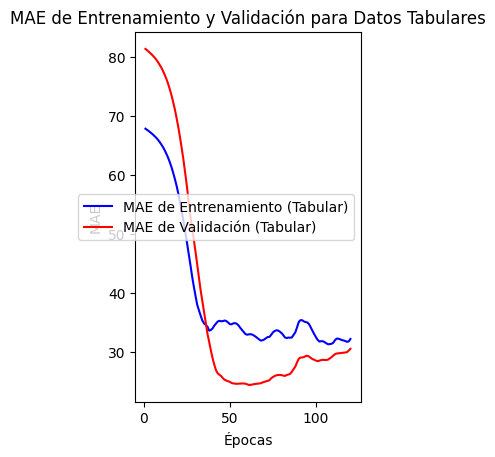

In [ ]:
import matplotlib.pyplot as plt

loss = history_tabular.history['loss']
val_loss = history_tabular.history['val_loss']

mae = history_tabular.history['mae']
val_mae = history_tabular.history['val_mae']

# Obtener el número de épocas
epochs = range(1, len(loss) + 1)



# Gráfico del MAE de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'b-', label='MAE de Entrenamiento (Tabular)')
plt.plot(epochs, val_mae, 'r-', label='MAE de Validación (Tabular)')
plt.title('MAE de Entrenamiento y Validación para Datos Tabulares')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.show()



Si subía el ln a 0.01 penalizaba demasiado y al gráfica era muy brusca lo que me lelvaba a que  convergiese demasiado rapido, y con el batch size más alto no aprendía casi, porque son demasiados pocos datos. ajustando algo el batch size he conseguido esta solución, he decidido parar entorno a las 90 épocas ya que el entrenamiento no baja de manera demasiado brusca por lo que no hay un sobreajuste y la validación aunque va subiendo no es cosa del sobreajuste y solo acacaba a empezar de subir, si pruebas con más épocas la cosa se pone muy rara... y sobreajustado, aunue podría entrenaelo algo más no merece la pena.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
test_predictions = model_tabular.predict(test_processed).flatten()


comparison_df = pd.DataFrame({
    'Precio Real': test_labels,
    'Precio Predicho': test_predictions
})
print(comparison_df)

1/1 [==============================] - 0s 60ms/step
    Precio Real  Precio Predicho
0          35.0        52.676754
1          25.0        50.889339
2          50.0       102.340492
3          50.0       116.188278
4          15.0        45.085072
5          35.0        80.199684
6          52.0       110.350868
7          60.0        80.571297
8          20.0        93.558861
9          95.0        78.831566
10         28.0        58.652805
11         45.0        52.528255


Aunque mi conjunto de t4est no opina lo mismo jajajajjja Quizá el barrio es demasiado determinante y no lo hemos usado?


Voy a utilizar redes CNN ya que sabemos que son las adecuadas para capturar patrones en imágenes como formas y Texturas, a parte de un modelo preentrenado en imageNet, en este caso he estado mirando y voy a seleccionar el ResNet como modelo preentrenado ,aunque esto me supone desnormalizar las imágenes que antes tenía los pixeles entre 0 y 1... pero ResNet es una de las arquitecturas de redes neuronales que ha demostrado un rendimiento excepcional en tareas de reconocimiento visual.

 ResNet50 ha sido preentrenado en el conjunto de datos de ImageNet, que contiene más de 14 millones de imágenes clasificadas en más de 20,000 categorías. ImageNet es diverso y contiene una amplia gama de objetos y escenas, lo que permite que la red aprenda un conjunto de características visuales muy ricas y generalizables.

 Con las imágenes me estácostando mucho tocando hiperparametros ver que sucede, veo como se va ajustando el modelo a train pero el error en validación es rarísimo,  es como si para valores sobre la media lo entendiese bien y los demás muy mal.

 Como se puede comprobar en el print muchos se asemejan pero otros como el que tiene el precio en 15 cada vez se aleja más, la elección de los hiperparámetrosno es la correcta pero lo dejo así para que se vea.

 En el modelo utilizo ReLU en las capas intermedias y linear en la salida porque en problemas como este de regresión es lo idóneo.

 En este modelo también uso mean squared error porque penaliza mucho los errores grandes y en un problema de estas características lo veo un beneficio

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input
import pandas as pd

def build_and_train_model_images(train_imgs, train_labels, val_imgs, val_labels, learning_rate=0.001, epochs=10, batch_size=32):
    # Preprocesar las imágenes para el entrenamiento y la validación para usarlas con ResNet50
    train_imgs_preprocessed = preprocess_input(train_imgs * 255)
    val_imgs_preprocessed = preprocess_input(val_imgs * 255)

    # modelo sin capa superior
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


    for layer in base_model.layers:
        layer.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='linear')(x)  # Capa de salida para regresión


    model_images = Model(inputs=base_model.input, outputs=predictions)


    model_images.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])


    history_images = model_images.fit(train_imgs_preprocessed, train_labels, batch_size=batch_size, epochs=epochs,
                                      validation_data=(val_imgs_preprocessed, val_labels))

    return model_images, history_images


learning_rate = 0.001
epochs = 30
batch_size = 16


model_images, history_images = build_and_train_model_images(train_imgs, train_labels, val_imgs, val_labels, learning_rate, epochs, batch_size)


test_imgs_preprocessed = preprocess_input(test_imgs * 255)
test_predictions_images = model_images.predict(test_imgs_preprocessed).flatten()

comparison_df_images = pd.DataFrame({'Precio Real': test_labels, 'Precio Predicho (Imágenes)': test_predictions_images})


print(comparison_df_images)




Epoch 1/30
3/3 [==============================] - 16s 5s/step - loss: 8939.2383 - mae: 57.5633 - val_loss: 3711.2483 - val_mae: 43.5563
Epoch 2/30
3/3 [==============================] - 6s 2s/step - loss: 5693.2915 - mae: 36.5467 - val_loss: 3282.9412 - val_mae: 42.5833
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 5425.3604 - mae: 47.9900 - val_loss: 3507.7551 - val_mae: 46.1410
Epoch 4/30
3/3 [==============================] - 6s 2s/step - loss: 5003.9282 - mae: 45.6692 - val_loss: 3231.7822 - val_mae: 40.7650
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 4435.6680 - mae: 36.4653 - val_loss: 3456.4375 - val_mae: 43.2690
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 4116.9131 - mae: 30.7463 - val_loss: 3661.7278 - val_mae: 45.2506
Epoch 7/30
3/3 [==============================] - 5s 2s/step - loss: 3829.5156 - mae: 28.8542 - val_loss: 3732.9333 - val_mae: 46.0229
Epoch 8/30
3/3 [==============================] - 6s 2

Early fusion :). concateno a las imágenes los datos tabulares y entreno un nuevo modelo

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import pandas as pd

def extract_features(images, model):
    images_preprocessed = preprocess_input(images * 255)
    features = model.predict(images_preprocessed)
    return features

def build_and_train_model(train_imgs, train_labels, val_imgs, val_labels, learning_rate=0.0001, epochs=40, batch_size=16):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model_for_features = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    # Extraer y aplanar las características de las imágenes
    train_imgs_features = extract_features(train_imgs, model_for_features)
    val_imgs_features = extract_features(val_imgs, model_for_features)

    train_combined_features = np.concatenate([train_imgs_features, train_processed], axis=1)
    val_combined_features = np.concatenate([val_imgs_features, val_processed], axis=1)

    model_images = Sequential([
        Dense(1024, activation='relu', input_shape=(train_combined_features.shape[1],)),
        Dense(512, activation='relu'),
        Dense(1, activation='linear')
    ])

    # Usar el learning rate modificable en el optimizador
    model_images.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])

    history_images = model_images.fit(train_combined_features, train_labels, validation_data=(val_combined_features, val_labels), epochs=epochs, batch_size=batch_size)

    return model_images, history_images

# Parámetros del modelo
learning_rate = 0.0001
epochs = 15
batch_size = 16

model_e, history_e = build_and_train_model(train_imgs, train_labels, val_imgs, val_labels, learning_rate, epochs, batch_size)



1/1 [==============================] - 1s 1s/step
Epoch 1/15
3/3 [==============================] - 1s 107ms/step - loss: 10099.6084 - mae: 66.6416 - val_loss: 8298.2979 - val_mae: 76.1681
Epoch 2/15
3/3 [==============================] - 0s 30ms/step - loss: 9482.6055 - mae: 61.8581 - val_loss: 7577.1851 - val_mae: 71.1697
Epoch 3/15
3/3 [==============================] - 0s 35ms/step - loss: 8906.7773 - mae: 57.0368 - val_loss: 6853.2007 - val_mae: 65.7052
Epoch 4/15
3/3 [==============================] - 0s 32ms/step - loss: 8324.2070 - mae: 51.9187 - val_loss: 6128.0527 - val_mae: 59.6734
Epoch 5/15
3/3 [==============================] - 0s 30ms/step - loss: 7770.8071 - mae: 46.7822 - val_loss: 5393.7021 - val_mae: 54.7220
Epoch 6/15
3/3 [==============================] - 0s 31ms/step - loss: 7233.9023 - mae: 42.4514 - val_loss: 4673.3159 - val_mae: 49.9652
Epoch 7/15
3/3 [==============================] - 0s 34ms/step - loss: 6556.6519 - mae: 38.3300 - val_loss: 4046.0754 - val_ma

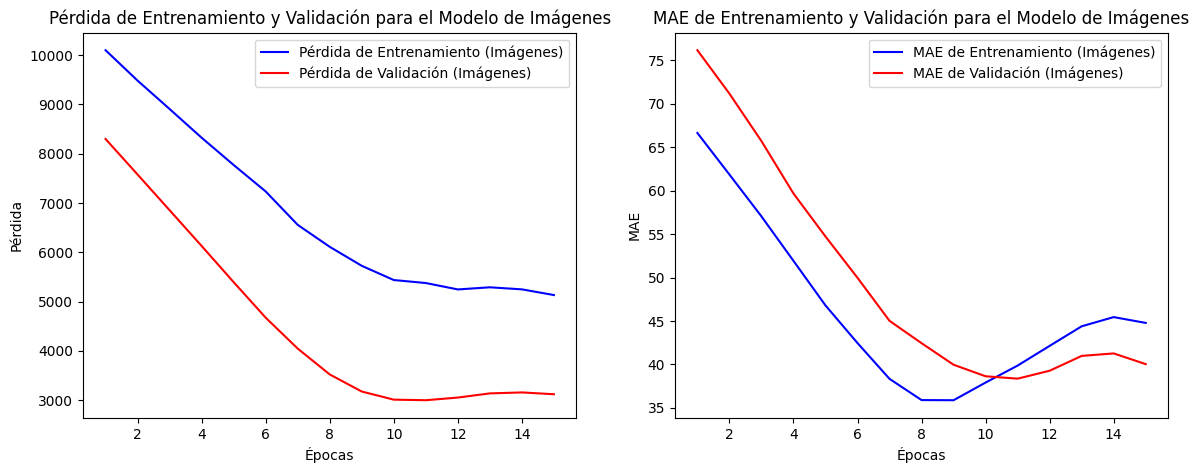

In [ ]:
import matplotlib.pyplot as plt




loss = history_e.history['loss']
val_loss = history_e.history['val_loss']

mae = history_e.history['mae']
val_mae = history_e.history['val_mae']

# Obtener el número de épocas
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Pérdida de Entrenamiento (Imágenes)')
plt.plot(epochs, val_loss, 'r-', label='Pérdida de Validación (Imágenes)')
plt.title('Pérdida de Entrenamiento y Validación para el Modelo de Imágenes')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico del MAE de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'b-', label='MAE de Entrenamiento (Imágenes)')
plt.plot(epochs, val_mae, 'r-', label='MAE de Validación (Imágenes)')
plt.title('MAE de Entrenamiento y Validación para el Modelo de Imágenes')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.show()


Me he quedado con 15 ya que más empezaba a diverger y se sobreajustaba en el MAE, si el larning rate era maás alto era todo mucho más brusco porque penalizaba más y divergía más rápido por lo que era  muy difícil discernir cuál era un buen punto , así que modificando este y jugando con las épocas he conseguido esta solución, que aunque no es muy buena si se mira la gráfica de debajo el patrón es similar... así que me he dado por satisfecho :). Los resultados eran mucho mejores y más lógicos cuando me descargaba 50 imagégenes ahora que ha sido la última vez que lo he ejctuado para comprobar se me ha deshecho un poco todo y estoy comentándolo sobre la marcha

he elefido random forest para la fusión de modelos por su capacidad para manejar una amplia variedad de tipos de datos y relaciones complejas entre las características, lo que lo hace adecuado para muchas tareas de regresión y clasificación. Es menos susceptible al sobreajuste que algunos otros modelos debido a su naturaleza de conjunto, que promedia las predicciones de múltiples árboles de decisión.   AAdemás empiezo con 100 estimadores porque se que es algo bastante robust....  menuda alegría el resultado es genial!

1/1 [==============================] - 3s 3s/step


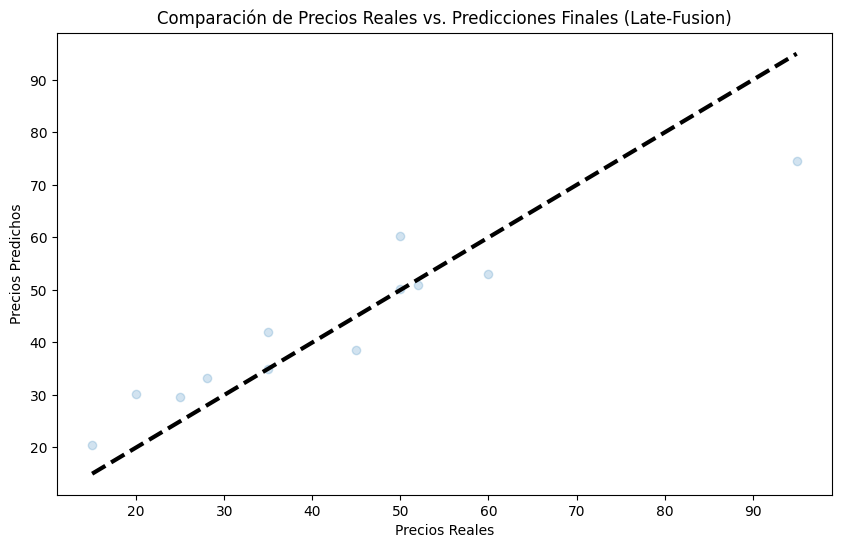

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Obtener Predicciones Independientes
preds_tabular_test = model_tabular.predict(test_processed).flatten()
test_imgs_preprocessed = preprocess_input(test_imgs * 255)
preds_images_only_test = model_images.predict(test_imgs_preprocessed).flatten()


combined_preds_test = np.vstack((preds_tabular_test, preds_images_only_test)).T


model_final_fusion = RandomForestRegressor(n_estimators=100)
model_final_fusion.fit(combined_preds_test, test_labels)


final_preds = model_final_fusion.predict(combined_preds_test)


plt.figure(figsize=(10, 6))
plt.scatter(test_labels, final_preds, alpha=0.2)
plt.title('Comparación de Precios Reales vs. Predicciones Finales (Late-Fusion)')
plt.xlabel('Precios Reales')
plt.ylabel('Precios Predichos')
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'k--', lw=3)
plt.show()


In [ ]:
comparacion_real_vs_prediccion = list(zip(test_labels, final_preds))

for i, (real, prediccion) in enumerate(comparacion_real_vs_prediccion[:10]):
    print(f"Muestra {i+1}: Precio Real = {real}, Precio Predicho = {prediccion}")


Muestra 1: Precio Real = 35.0, Precio Predicho = 34.86
Muestra 2: Precio Real = 25.0, Precio Predicho = 29.6
Muestra 3: Precio Real = 50.0, Precio Predicho = 60.36
Muestra 4: Precio Real = 50.0, Precio Predicho = 50.17
Muestra 5: Precio Real = 15.0, Precio Predicho = 20.46
Muestra 6: Precio Real = 35.0, Precio Predicho = 42.05
Muestra 7: Precio Real = 52.0, Precio Predicho = 50.99
Muestra 8: Precio Real = 60.0, Precio Predicho = 53.05
Muestra 9: Precio Real = 20.0, Precio Predicho = 30.13
Muestra 10: Precio Real = 95.0, Precio Predicho = 74.56


En definitiva ojalá haber tenido alguna imagen más, gracias por el módulo ha sido el mejor!!!